In [49]:
import torch
import numpy as np
import json
from transformers import AutoTokenizer
import networkx as nx
import matplotlib.pyplot as plt
import hierarchical as hrc
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

device = "cpu"
MODEL_NAME = "google/gemma-2b"
g, _, _ = hrc.get_g(MODEL_NAME, device)
vocab_dict, vocab_list = hrc.get_vocab(MODEL_NAME)
vocab_set = set(vocab_dict.keys())

Loading checkpoint shards: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:15<00:00,  7.83s/it]


In [173]:
import inflect
p = inflect.engine()

def make_token_set(word_list, pluralize=False, capitalize=True):
    result = set()

    for w in word_list:
        if capitalize: w = w.lower()
        candidates = ["▁" + w, "▁" + w.capitalize()] if capitalize else ["▁" + w]
        if pluralize:
            plural = p.plural(word)
            candidates += [plural, plural.capitalize()]
        for token in vocab_set.intersection(candidates):
            result.add(token)

    return result

In [107]:
g.shape

torch.Size([256000, 2048])

In [112]:
def find_nearest_tokens(point, k=10):
    query_vector = point.unsqueeze(0)  # (1, d)
    distances = torch.norm(g - query_vector, dim=1)  # (n, d)
    distances, indices = torch.topk(distances, k=k, largest=False)
    return [(distances[i], vocab_list[indices[i]]) for i in range(k)]

## color & plant / vegetable intersection

## fruit / vegetable intersection

## concept arithmetic

In [117]:
'▁Queen' in vocab_set, '▁queen' in vocab_set, 'Queen' in vocab_set, 'queen' in vocab_set

(True, True, True, True)

In [137]:
'▁Queens' in vocab_set, '▁queens' in vocab_set, 'Queens' in vocab_set, 'queens' in vocab_set

(True, True, True, True)

In [146]:
'▁QUEEN' in vocab_set, '▁QUEENS' in vocab_set, 'QUEEN' in vocab_set, 'QUEENS' in vocab_set

(True, False, True, False)

In [118]:
'▁King' in vocab_set, '▁king' in vocab_set, 'King' in vocab_set, 'king' in vocab_set

(True, True, True, True)

In [145]:
'▁KING' in vocab_set, '▁KINGS' in vocab_set, 'KING' in vocab_set, 'KINGS' in vocab_set

(True, True, True, False)

In [136]:
'▁Kings' in vocab_set, '▁kings' in vocab_set, 'Kings' in vocab_set, 'kings' in vocab_set

(True, True, True, True)

In [119]:
'▁Man' in vocab_set, '▁man' in vocab_set, 'Man' in vocab_set, 'man' in vocab_set

(True, True, True, True)

In [134]:
'▁Men' in vocab_set, '▁men' in vocab_set, 'Men' in vocab_set, 'men' in vocab_set

(True, True, True, True)

In [120]:
'▁Woman' in vocab_set, '▁woman' in vocab_set, 'Woman' in vocab_set, 'woman' in vocab_set

(True, True, True, True)

In [135]:
'▁Women' in vocab_set, '▁women' in vocab_set, 'Women' in vocab_set, 'women' in vocab_set

(True, True, True, True)

In [133]:
make_token_set(["king"], pluralize=True), make_token_set(["queen"], pluralize=True)

({'▁King', '▁king'}, {'▁Queen', '▁queen'})

In [147]:
queen_tokens = {'▁Queen', '▁queen', 'Queen', 'queen', '▁Queens', '▁queens', 'Queens', 'queens', '▁QUEEN', 'QUEEN'}
king_tokens = {'▁King', '▁king', 'King', 'king', '▁Kings', '▁kings', 'Kings', 'kings', '▁KING', '▁KINGS', 'KING'}
man_tokens = {'▁Man', '▁man', 'Man', 'man', '▁Men', '▁men', 'Men', 'men'}
woman_tokens = {'▁Woman', '▁woman', 'Woman', 'woman', '▁Women', '▁women', 'Women', 'women'}
queen_dir = hrc.estimate_cat_dir(queen_tokens, g, vocab_dict)['lda']
king_dir = hrc.estimate_cat_dir(king_tokens, g, vocab_dict)['lda']
man_dir = hrc.estimate_cat_dir(man_tokens, g, vocab_dict)['lda']
woman_dir = hrc.estimate_cat_dir(woman_tokens, g, vocab_dict)['lda']

In [139]:
man_to_king_dir = king_dir - man_dir

man_to_woman_dir = woman_dir - man_dir

In [151]:
for tok in woman_tokens:
    print(f'{tok} (man -> king) ->')
    toks = find_nearest_tokens(g[vocab_dict[tok]] + man_to_king_dir, 10)
    for dist, tok in toks:
        print(f'  {tok} ({dist})')
    print()

▁Women (man -> king) ->
  ▁Women (32.68610382080078)
  Women (35.51155090332031)
  ▁women (38.54314041137695)
  ▁WOMEN (39.1690559387207)
  women (42.9281005859375)
  Kings (44.43843078613281)
  King (44.784027099609375)
  ▁Kings (45.658565521240234)
  ▁kings (46.13455581665039)
  ▁King (46.665870666503906)

Woman (man -> king) ->
  Woman (32.68610382080078)
  ▁Woman (40.31901168823242)
  ▁woman (44.00746154785156)
  Kings (44.9528923034668)
  ▁WOMAN (45.06501770019531)
  King (45.9000129699707)
  woman (46.6197624206543)
  ▁Kings (47.09535598754883)
  Women (47.10016632080078)
  ▁kings (47.3313102722168)

▁Woman (man -> king) ->
  ▁Woman (32.68610382080078)
  Woman (39.07573318481445)
  ▁WOMAN (41.87467956542969)
  ▁woman (42.152870178222656)
  ▁Women (45.74668884277344)
  Kings (45.90701675415039)
  King (46.344154357910156)
  Women (46.52138900756836)
  ▁Kings (47.10441589355469)
  ▁kings (47.20287322998047)

Women (man -> king) ->
  Women (32.68610382080078)
  ▁Women (37.0856323242

In [149]:
for tok in king_tokens:
    print(f'{tok} (man -> woman) ->')
    toks = find_nearest_tokens(g[vocab_dict[tok]] + man_to_woman_dir, 3)
    for dist, tok in toks:
        print(f'  {tok} ({dist})')
    print()

▁KING (man -> woman) ->
  ▁KING (33.05575942993164)
  ▁King (39.7712287902832)
  King (40.049495697021484)

▁KINGS (man -> woman) ->
  ▁KINGS (33.05575942993164)
  ▁Kings (44.578819274902344)
  Women (44.9034423828125)

▁king (man -> woman) ->
  ▁king (33.05575942993164)
  ▁King (40.4839973449707)
  King (40.61898422241211)

king (man -> woman) ->
  king (33.05575942993164)
  KING (46.258934020996094)
  Women (47.197959899902344)

▁Kings (man -> woman) ->
  ▁Kings (33.05575942993164)
  Kings (38.98957824707031)
  Women (44.38154983520508)

kings (man -> woman) ->
  kings (33.05575942993164)
  Women (45.777740478515625)
  Kings (46.69456481933594)

Kings (man -> woman) ->
  Kings (33.05575942993164)
  ▁Kings (40.82627868652344)
  Women (43.23886489868164)

KING (man -> woman) ->
  KING (33.05575942993164)
  Women (44.55961608886719)
  ▁women (45.746768951416016)

▁kings (man -> woman) ->
  ▁kings (33.05575942993164)
  ▁Kings (43.688255310058594)
  Women (43.78099822998047)

▁King (man -

## letters from different regions

In [227]:
def plot3(name_to_tokens, union_name):
    fig = plt.figure(figsize=(20, 8))
    ax = fig.add_subplot(121, projection='3d')
    
    union_tokens = set().union(*name_to_tokens.values())
    
    dirs = dict(
        union=hrc.estimate_cat_dir(union_tokens, g, vocab_dict),
        **{k: hrc.estimate_cat_dir(tokens, g, vocab_dict) for k, tokens in name_to_tokens.items()}
    )

    k1, k2, k3 = name_to_tokens.keys()
    toks1, toks2, toks3 = name_to_tokens.values()
    dir1, dir2, dir3 = [dirs[k]["lda"] for k in name_to_tokens.keys()]
    higher_dir = dirs['union']["lda"]
    
    xaxis = dir1 / dir1.norm()
    yaxis = dir2 - (dir2 @ xaxis) * xaxis
    yaxis = yaxis / yaxis.norm()
    zaxis = dir3 - (dir3 @ xaxis) * xaxis - (dir3 @ yaxis) * yaxis
    zaxis = zaxis / zaxis.norm()
    
    axes = torch.stack([xaxis, yaxis, zaxis], dim=1)
    
    ind1, ind2, ind3 = [hrc.category_to_indices(toks, vocab_dict) for toks in name_to_tokens.values()]
    
    g1, g2, g3 = g[ind1], g[ind2], g[ind3]
    
    proj1 = (g1 @ axes).cpu().numpy()
    proj2 = (g2 @ axes).cpu().numpy()
    proj3 = (g3 @ axes).cpu().numpy()
    proj = (g @ axes).cpu().numpy()
    
    P1 = (dir1 @ axes).cpu().numpy()
    P2 = (dir2 @ axes).cpu().numpy()
    P3 = (dir3 @ axes).cpu().numpy()
    P4 = (higher_dir @ axes).cpu().numpy()
    
    ax.scatter(P1[0], P1[1], P1[2], color='r', s=100)
    ax.scatter(P2[0], P2[1], P2[2], color='g', s=100)
    ax.scatter(P3[0], P3[1], P3[2], color='b', s=100)
    
    verts = [list(zip([P1[0], P2[0], P3[0]], [P1[1], P2[1], P3[1]], [P1[2], P2[2], P3[2]]))]
    triangle = Poly3DCollection(verts, alpha=.2, linewidths=1, linestyle =  "--", edgecolors='k')
    triangle.set_facecolor('yellow')
    ax.add_collection3d(triangle)
    
    ax.quiver(0, 0, 0, P1[0], P1[1], P1[2], color='r', arrow_length_ratio=0.01)
    ax.quiver(0, 0, 0, P2[0], P2[1], P2[2], color='g', arrow_length_ratio=0.01)
    ax.quiver(0, 0, 0, P3[0], P3[1], P3[2], color='b', arrow_length_ratio=0.01)
    ax.quiver(0, 0, 0, P4[0], P4[1], P4[2], color='k', arrow_length_ratio=0.1, linewidth=2)
    
    
    scatter1 = ax.scatter(proj1[:,0], proj1[:,1], proj1[:,2], c='r', label=k1)
    scatter2 = ax.scatter(proj2[:,0], proj2[:,1], proj2[:,2], c='g', label=k2)
    scatter3 = ax.scatter(proj3[:,0], proj3[:,1], proj3[:,2], c='b', label=k3)
    scatter = ax.scatter(proj[:,0], proj[:,1], proj[:,2], c='gray', s= 0.05, alpha = 0.03)
    
    scale = 1.2
    ax.text(P1[0]*scale + 2, P1[1]* scale, P1[2]*scale, k1, bbox=dict(facecolor='r', alpha=0.2))
    ax.text(P2[0]*scale+0.5, P2[1]* scale+0.5, P2[2]*scale, k2, bbox=dict(facecolor='g', alpha=0.2))
    ax.text(P3[0]*scale, P3[1]* scale, P3[2]*scale, k3, bbox=dict(facecolor='b', alpha=0.2))
    ax.text(P4[0]-0.6, P4[1]-0.6, P4[2], union_name, bbox=dict(facecolor='k', alpha=0.2))
    
    normal_vector = np.cross(P2 - P1, P3 - P1)
    normal_vector = normal_vector / np.linalg.norm(normal_vector)
    normal_mag = P1 @ normal_vector
    normal_vector = normal_vector * normal_mag
    
    P1_normal = P1 - normal_vector
    P2_normal = P2 - normal_vector
    P3_normal = P3 - normal_vector
    
    ax.quiver(normal_vector[0], normal_vector[1], normal_vector[2], P1_normal[0], P1_normal[1], P1_normal[2],
              color='r', linestyle =  "--", arrow_length_ratio=0.01)
    ax.quiver(normal_vector[0], normal_vector[1], normal_vector[2], P2_normal[0], P2_normal[1], P2_normal[2],
              color='g', linestyle =  "--", arrow_length_ratio=0.01)
    ax.quiver(normal_vector[0], normal_vector[1], normal_vector[2], P3_normal[0], P3_normal[1], P3_normal[2],
              color='b', linestyle =  "--", arrow_length_ratio=0.01)
    
    ax.quiver(0, 0, 0, normal_vector[0], normal_vector[1], normal_vector[2], color='purple',
              linestyle =  "--", arrow_length_ratio=0.01)
    
    
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    ax.set_zlim(0, 25)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.view_init(elev=20, azim=85)

### by shape

In [4]:
greek_upper    = ["Α",      "Β", "Γ", "Δ", "Ε",                                    "Η", "Θ", "Ι",      "Κ", "Λ",      "Μ", "Ν", "Ξ", "Ο", "Π", "Ρ", "Σ",           "Τ", "Υ", "Φ",      "Χ", "Ψ", "Ω", "Ζ"]
latin_upper    = ["A",      "B", "C", "D", "E", "F", "G",                          "H",      "I", "J", "K", "L",      "M", "N",      "O",      "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y",      "Z"]
cyrillic_upper = ["А", "Б", "В", "С", "Г", "Д", "Е", "Ж", "З", "И", "Й", "К", "Л", "Н", "О", "П", "Р",  "У", "М", "Ф", "Ц", "Ч", "Ш", "Щ", "Ъ", "Ы", "Ь", "Т", "Э", "Ю", "Я", "Х"]

greek_upper_shared    = ["Α", "Β", "Ε", "Η", "Μ", "Ρ", "Τ", "Χ"]
latin_upper_shared    = ["A", "B", "E", "H", "M", "P", "T", "X"]
cyrillic_upper_shared = ["А", "В", "Е", "Н", "М", "Р", "Т", "Х"]

In [228]:
([ord(c) for c in latin_upper_shared],
 [ord(c) for c in greek_upper_shared],
 [ord(c) for c in cyrillic_upper_shared],
)

([65, 66, 69, 72, 77, 80, 84, 88],
 [913, 914, 917, 919, 924, 929, 932, 935],
 [1040, 1042, 1045, 1053, 1052, 1056, 1058, 1061])

In [157]:
upper_letters = greek_upper + latin_upper + cyrillic_upper
lower_letters = [c.lower() for c in upper_letters]
all_letters = upper_letters + lower_letters

In [161]:
len(upper_letters), len(lower_letters), len(all_letters)

(82, 82, 164)

In [175]:
len(upper_tokens), len(lower_tokens), len(upper_lower_tokens)

(78, 79, 157)

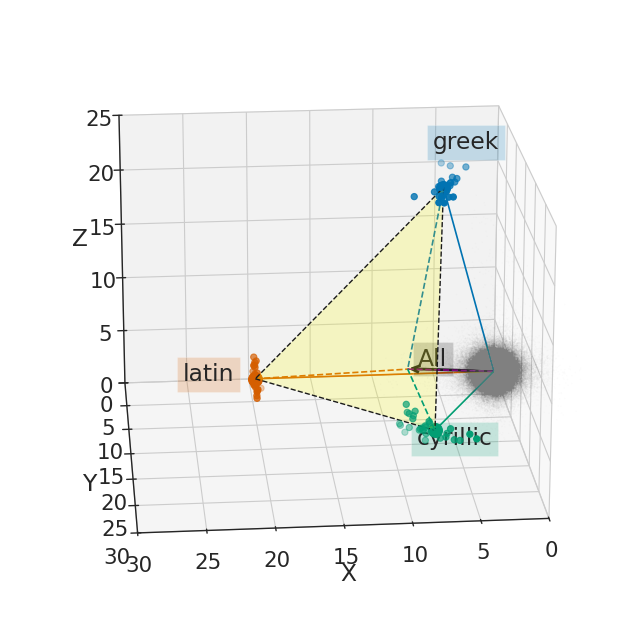

In [215]:
latin, cyrillic, greek = [make_token_set(toks, capitalize=False) for toks in [latin_upper, cyrillic_upper, greek_upper]]

plot3(dict(latin=latin, cyrillic=cyrillic, greek=greek), "All")

In [223]:
As, Bs, Es, Hs, Ms, Ps, Ts, Xs = list(zip(greek_upper_shared, latin_upper_shared, cyrillic_upper_shared))

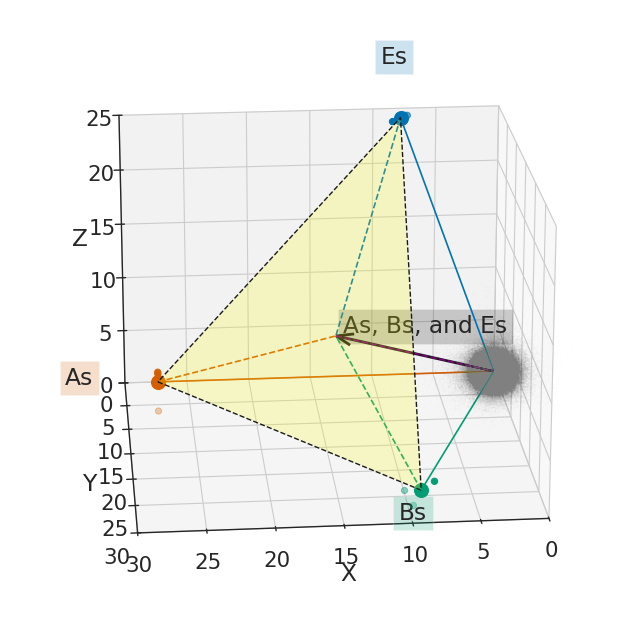

In [216]:
plot3(dict(As=As, Bs=Bs, Es=Es), "As, Bs, and Es")

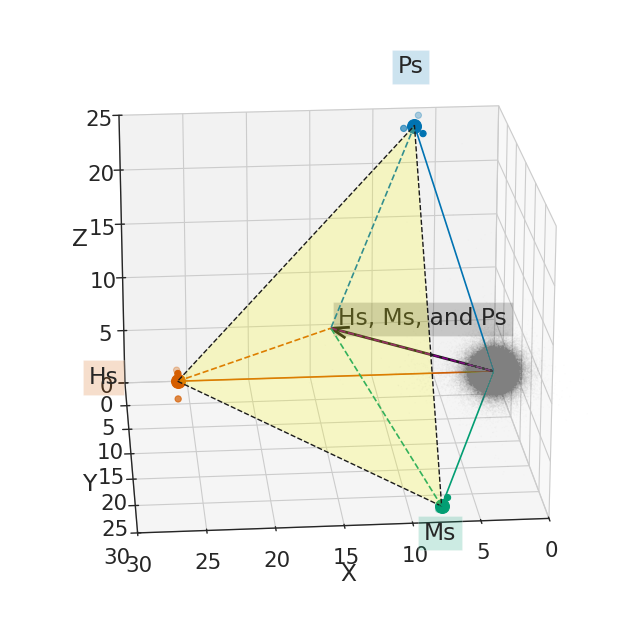

In [226]:
plot3(dict(Hs=Hs, Ms=Ms, Ps=Ps), "Hs, Ms, and Ps")

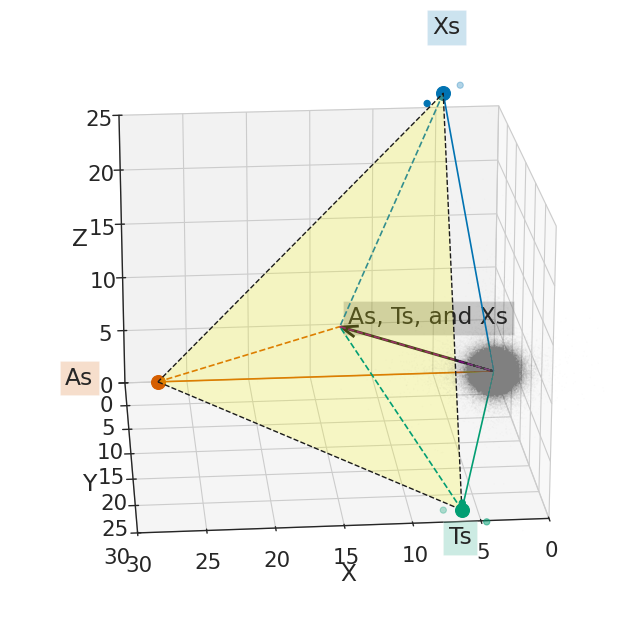

In [224]:
plot3(dict(As=As, Ts=Ts, Xs=Xs), "As, Ts, and Xs")

/var/folders/53/ctpjg1ms49gf8cnylqjgvj8h0000gn/T/ipykernel_22578/2369003651.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


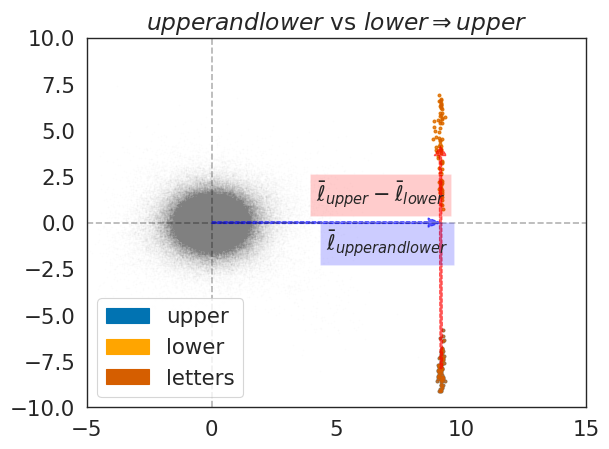

In [177]:
upper_tokens = make_token_set(upper_letters, capitalize=False)

fig, ax = plt.subplots()

inds = {"upper": hrc.category_to_indices(upper_tokens, vocab_dict),
         "lower": hrc.category_to_indices(lower_tokens, vocab_dict),
         "letters": hrc.category_to_indices(upper_lower_tokens, vocab_dict)}

higher = hrc.estimate_cat_dir(upper_lower_tokens, g, vocab_dict)['lda']
subcat1 = hrc.estimate_cat_dir(upper_tokens, g, vocab_dict)['lda']
subcat2 = hrc.estimate_cat_dir(lower_tokens, g, vocab_dict)['lda']

hrc.proj_2d_single_diff(higher, subcat1, subcat2,
                        g, vocab_list, ax,
                        normalize = True,
                        orthogonal = True,
                        added_inds=inds, k = 50, fontsize= 15,
                        draw_arrows= True,
                        arrow1_name=rf'$\bar{{\ell}}_{{upper and lower}}$',
                        arrow2_name=rf'$\bar{{\ell}}_{{upper}} - \bar{{\ell}}_{{lower}}$',
                        alpha = 0.03,  s = 0.05,
                        target_alpha=0.6, target_s=4,
                        xlim = (-5,15), ylim = (-10,10),
                        right_topk = False,
                        left_topk = False,
                        top_topk = False,
                        bottom_topk = False,
                        xlabel = "", ylabel="",
                        title = rf'$upper and lower$ vs $lower \Rightarrow upper$')

fig.tight_layout()
fig.savefig(f"figures/upper_vs_lower.png", dpi=300, bbox_inches='tight')
fig.show()

Text(5, 5, 'cyrillic')

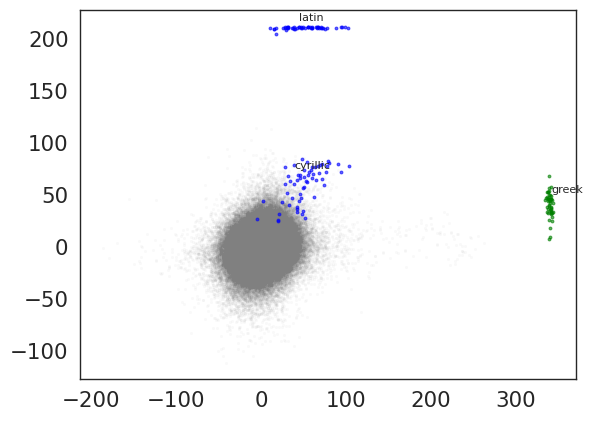

In [101]:
greek_tokens = make_token_set(greek_upper)
latin_tokens = make_token_set(latin_upper)
cyrillic_tokens = make_token_set(cyrillic_upper)

dirs = dict(
    greek=hrc.estimate_cat_dir(greek_tokens, g, vocab_dict),
    latin=hrc.estimate_cat_dir(latin_tokens, g, vocab_dict),
    cyrillic=hrc.estimate_cat_dir(cyrillic_tokens, g, vocab_dict),
)

fig, ax = plt.subplots()
proj1 = g @ dirs['greek']['lda']
proj2 = g @ dirs['latin']['lda']
ax.scatter(proj1.cpu().numpy(), proj2.cpu().numpy(), alpha=0.03, color="gray", s=2)

for i in hrc.category_to_indices(greek_tokens, vocab_dict):
    word = vocab_list[i]
    x, y = proj1[i].cpu().numpy(), proj2[i].cpu().numpy()
    ax.scatter(x, y, alpha=0.6, color="green", s=4)
ax.annotate('greek', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)

for i in hrc.category_to_indices(latin_tokens, vocab_dict):
    word = vocab_list[i]
    x, y = proj1[i].cpu().numpy(), proj2[i].cpu().numpy()
    ax.scatter(x, y, alpha=0.6, color="blue", s=4)
ax.annotate('latin', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)

for i in hrc.category_to_indices(cyrillic_tokens, vocab_dict):
    word = vocab_list[i]
    x, y = proj1[i].cpu().numpy(), proj2[i].cpu().numpy()
    ax.scatter(x, y, alpha=0.6, color="blue", s=4)
ax.annotate('cyrillic', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)

In [115]:
latin_to_cyrillic = dirs['cyrillic']['lda'] - dirs['latin']['lda']
latin_to_greek = dirs['greek']['lda'] - dirs['latin']['lda']

for letter in latin_upper_shared:
    print(f'{letter} ->')
    c_toks = find_nearest_tokens(g[vocab_dict[letter]] + latin_to_cyrillic, 3)
    g_toks = find_nearest_tokens(g[vocab_dict[letter]] + latin_to_greek, 3)
    for dist, tok in c_toks:
        print(f'  {tok} ({dist})')
    for dist, tok in g_toks:
        print(f'  {tok} ({dist})')
    print()

A ->
  A (14.787308692932129)
  ▁A (32.72658157348633)
  ▁А (35.735374450683594)
  A (21.46249771118164)
  ▁A (35.81428909301758)
  ▁А (39.55595016479492)

B ->
  B (14.787308692932129)
  ▁B (33.13855743408203)
  ▁Б (36.82127380371094)
  B (21.462499618530273)
  ▁B (36.25705337524414)
  Ｂ (40.31845474243164)

E ->
  E (14.787308692932129)
  ▁E (33.29338836669922)
  ▁Е (39.21244812011719)
  E (21.46249771118164)
  ▁E (36.358821868896484)
  ▁Е (42.37937545776367)

H ->
  H (14.787308692932129)
  ▁H (32.02090835571289)
  Ｈ (40.722267150878906)
  H (21.462499618530273)
  ▁H (34.988136291503906)
  Ｈ (43.05674362182617)

M ->
  M (14.787308692932129)
  ▁M (33.01568603515625)
  ▁М (36.015323638916016)
  M (21.46249771118164)
  ▁M (35.75956344604492)
  ▁М (39.77760314941406)

P ->
  P (14.787308692932129)
  ▁P (32.3993034362793)
  ▁П (39.02677917480469)
  P (21.46249771118164)
  ▁P (35.40009689331055)
  ▁П (42.67750549316406)

T ->
  T (14.787308692932129)
  ▁T (32.81724548339844)
  ▁Т (36.334

### numbers

In [23]:
cjk_digits = set(["一", "二", "三", "四", "五", "六", "七", "八", "九", "十", "百", "千", "万"])

In [44]:
hardcoded = {
    '百': 100,
    '一百': 100,
    '二百': 200,
    '三百': 300,
    '五百': 500,
    '一千': 1000,
    '千': 1000,
    '三千': 3000, 
    '万': 10_000, 
    '万一': 10_001, 
    '百万': 1_000_000,
    '千万': 10_000_000
}

def cjk_to_number(s: str) -> int:
    if s in hardcoded:
        return hardcoded[s]
    result = 0
    while s:
        result *= 10
        result += ["一", "二", "三", "四", "五", "六", "七", "八", "九", "十"].index(s[0]) + 1
        s = s[1:]
    return result

In [52]:
cjk_numbers = sorted([k for k in vocab_dict.keys() if all(d in cjk_digits for d in k) and str(cjk_to_number(k))], key=cjk_to_number)
arabic_numerals = [str(cjk_to_number(s)) for s in cjk_numbers]

In [ ]:
list(zip(cjk_numbers, arabic_numerals))

In [54]:
cjk_number_tokens = make_token_set(cjk_numbers)
arabic_numeral_tokens = make_token_set(arabic_numerals)

In [57]:
len(arabic_numeral_tokens), len(cjk_number_tokens)

(0, 14)

In [62]:
set(arabic_numerals).intersection(vocab_set)

{'1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [65]:
[k for k in vocab_dict.keys() if all(d in "0123456789" for d in k)]

['7', '8', '0', '4', '5', '9', '2', '6', '3', '1']

In [69]:
cjk_number_tokens = make_token_set(["一", "二", "三", "四", "五", "六", "七", "八", "九", "十"])
arabic_numeral_tokens = set([str(x) for x in range(10)])

In [231]:
cjk_number_tokens, arabic_numeral_tokens

({'▁一', '▁七', '▁三', '▁九', '▁二', '▁五', '▁八', '▁六', '▁十', '▁四'},
 {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'})

In [113]:
arabic_to_cjk = hrc.estimate_cat_dir(cjk_number_tokens, g, vocab_dict)['lda'] - hrc.estimate_cat_dir(arabic_numeral_tokens, g, vocab_dict)['lda']

for i in range(10):
    cjk_loc = g[vocab_dict[str(i)]] + arabic_to_cjk
    print(f'{i} ->')
    toks = find_nearest_tokens(cjk_loc, 3)
    for dist, tok in toks:
        print(f'  {tok} ({dist})')
    print()

0 ->
   (31.47571563720703)
   (31.505762100219727)
  ஡ (31.51113510131836)

1 ->
  ▁一 (29.207889556884766)
  ⏡ (31.11833953857422)
   (31.154016494750977)

2 ->
  ▁۲ (30.88887596130371)
  ２ (31.433170318603516)
   (31.44261932373047)

3 ->
  ▁三 (24.679832458496094)
  三 (28.263898849487305)
  ▁۳ (29.06065559387207)

4 ->
  ▁四 (27.264179229736328)
  四 (28.638147354125977)
  ▁۴ (29.19561004638672)

5 ->
  ▁五 (27.110485076904297)
  五 (28.063730239868164)
  ▁۵ (30.493528366088867)

6 ->
  六 (29.160919189453125)
  ▁六 (29.59738540649414)
  ▁۶ (29.65677261352539)

7 ->
  七 (29.26580810546875)
  ▁七 (30.171669006347656)
  ▁۷ (30.348644256591797)

8 ->
  ▁八 (29.524690628051758)
  八 (29.781944274902344)
  ▁۸ (31.49394989013672)

9 ->
  九 (30.500429153442383)
  ▁九 (31.27342414855957)
  ▁۹ (32.228546142578125)



/var/folders/53/ctpjg1ms49gf8cnylqjgvj8h0000gn/T/ipykernel_22578/492347477.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


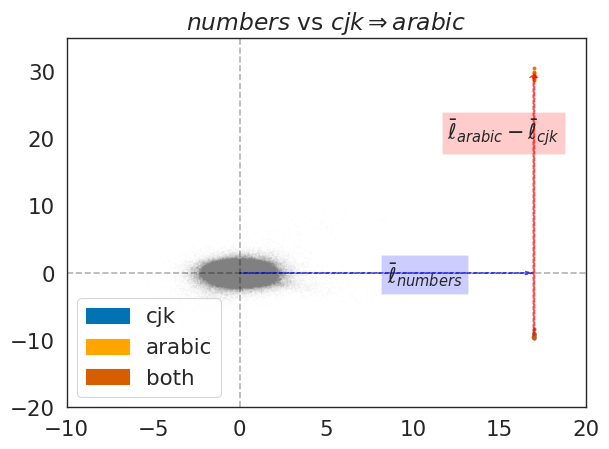

In [88]:
fig, ax = plt.subplots()

both_tokens = cjk_number_tokens | arabic_numeral_tokens

inds1 = {"cjk": hrc.category_to_indices(cjk_number_tokens, vocab_dict),
         "arabic": hrc.category_to_indices(arabic_numeral_tokens, vocab_dict),
         "both": hrc.category_to_indices(both_tokens, vocab_dict)}

higher = hrc.estimate_cat_dir(both_tokens, g, vocab_dict)['lda']
subcat1 = hrc.estimate_cat_dir(cjk_number_tokens, g, vocab_dict)['lda']
subcat2 = hrc.estimate_cat_dir(arabic_numeral_tokens, g, vocab_dict)['lda']

hrc.proj_2d_single_diff(higher, subcat1, subcat2,
                        g, vocab_list, ax,
                        normalize = True,
                        orthogonal = True,
                        added_inds=inds1, k = 50, fontsize= 15,
                        draw_arrows= True,
                        arrow1_name=rf'$\bar{{\ell}}_{{numbers}}$',
                        arrow2_name=rf'$\bar{{\ell}}_{{arabic}} - \bar{{\ell}}_{{cjk}}$',
                        alpha = 0.03,  s = 0.05,
                        target_alpha=0.6, target_s=4,
                        xlim = (-10,20), ylim = (-20,35),
                        right_topk = False,
                        left_topk = False,
                        top_topk = False,
                        bottom_topk = False,
                        xlabel = "", ylabel="",
                        title = rf'$numbers$ vs $cjk \Rightarrow arabic$')

fig.tight_layout()
fig.savefig(f"figures/cjk_vs_arabic.png", dpi=300, bbox_inches='tight')
fig.show()

In [72]:
cjk_dir = hrc.estimate_cat_dir(cjk_number_tokens, g, vocab_dict)["lda"]
arabic_dir = hrc.estimate_cat_dir(arabic_numeral_tokens, g, vocab_dict)["lda"]
both_dir = hrc.estimate_cat_dir(both_tokens, g, vocab_dict)["lda"]

dir1 = both_dir
dir1 = dir1 / dir1.norm()

dir2 = arabic_dir - cjk_dir
dir2 = dir2 - (dir2 @ dir1) * dir1
dir2 = dir2 / dir2.norm()

proj1 = g @ dir1
proj2 = g @ dir2

/var/folders/53/ctpjg1ms49gf8cnylqjgvj8h0000gn/T/ipykernel_22578/3333291969.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


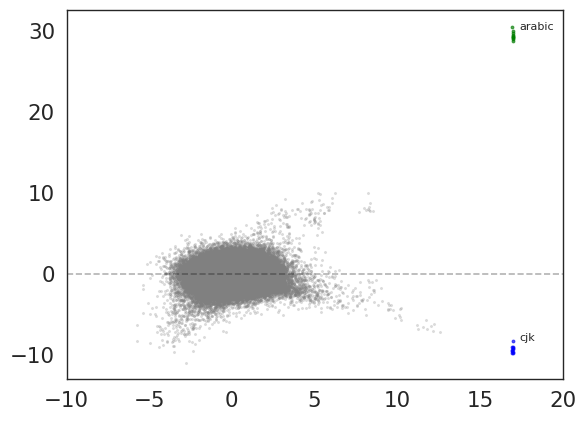

In [91]:
fig, ax = plt.subplots()

ax.scatter(proj1.cpu().numpy(), proj2.cpu().numpy(), alpha=0.2, color="gray", s=2)

xlim, ylim = (-10, 20), (-20,35)
ax.set_xlim(xlim)
ax.hlines(0, xmax=xlim[1], xmin=xlim[0],
          colors="black", alpha=0.3, linestyles="dashed")
# ax.set_ylim(ylim)
# ax.vlines(0, ymax=ylim[1], ymin=ylim[0],
#           colors="black", alpha=0.3, linestyles="dashed")

for i in hrc.category_to_indices(arabic_numeral_tokens, vocab_dict):
    word = vocab_list[i]
    x, y = proj1[i].cpu().numpy(), proj2[i].cpu().numpy()
    ax.scatter(x, y, alpha=0.6, color="green", s=4)
ax.annotate('arabic', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)

for i in hrc.category_to_indices(cjk_number_tokens, vocab_dict):
    word = vocab_list[i]
    x, y = proj1[i].cpu().numpy(), proj2[i].cpu().numpy()
    ax.scatter(x, y, alpha=0.6, color="blue", s=4)
ax.annotate('cjk', (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8)

fig.show()

In [ ]:
({'▁一', '▁七', '▁三', '▁九', '▁二', '▁五', '▁八', '▁六', '▁十', '▁四'},
 {'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'})

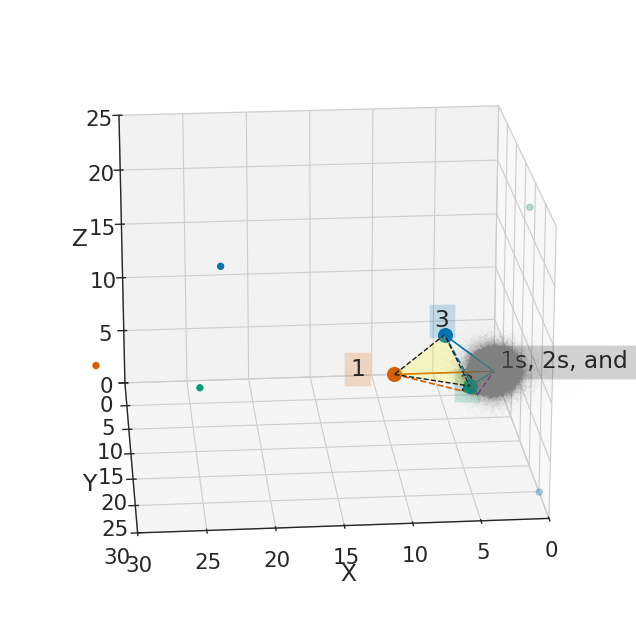

In [232]:
plot3({'1': ['▁一', '1'], '2': ['▁二', '2'], '3': ['▁三', '3']}, '1s, 2s, and 3s')